[[1 1 1]
 [2 0 1]] []


[[1 1 1]] [[-1  0 -1]]


[-2.0999595 -1.9399627  3.099937 ]


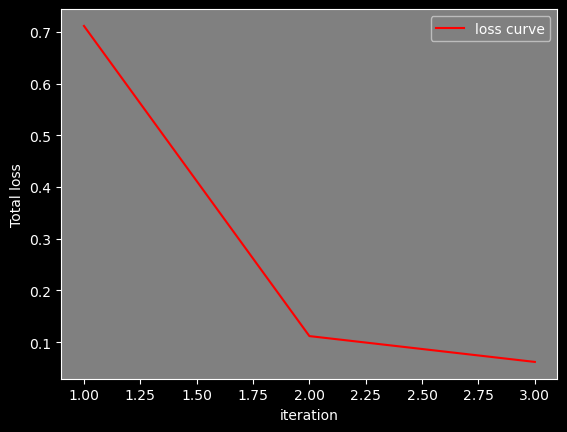

In [10]:
import numpy as np
import matplotlib.pyplot as plt

lambda_c = 0.0001
learning_rate = 0.05
W = np.array((-1.95, -1.84, 3.20))
data_neg = np.array([(1,1,1),(2,2,1),(2,0,1)])
data_pos = np.array([(0,0,1),(1,0,1),(0,1,1)])

def hinge_loss(label, W, X):
    return max(0, 1-label*(W.T@X))

def error(L,W):
    return sum(L)+lambda_c*(W.T@W)

def gradient(L,W):
    L_neg = L[0:3];L_neg=np.array(L_neg)
    L_pos = L[3:6];L_pos=np.array(L_pos)
    data_neg_new = data_neg[L_neg>0]
    data_pos_new = -data_pos[L_pos>0]
    print(data_neg_new,data_pos_new)
    print("\n")
    return sum(data_neg_new) + sum(data_pos_new) + 2*lambda_c*W



max_iteration = 1000
total_loss = [0]
cur_iter = 0

for iteration in range(0,max_iteration):
    L = []
    for item in data_neg:
        cur_hinge = hinge_loss(-1, W, item)
        L.append(cur_hinge)
    for item in data_pos:
        cur_hinge = hinge_loss(1, W, item)
        L.append(cur_hinge)
    cur_total = error(L,W)
    total_loss.append(cur_total)
    if abs(total_loss[iteration+1]-total_loss[iteration]) < 0.06:
        cur_iter = iteration
        break
    W = W - learning_rate*gradient(L,W)
print(W)
x = np.arange(1,iteration+2)  
total_loss.remove(0)
y=total_loss
plt.rcParams['axes.facecolor'] = 'gray' # 【背景颜色为灰色】
plt.plot(x,y,"r",label="loss curve")
plt.xlabel("iteration")
plt.ylabel("Total loss")
plt.legend()
plt.show()
